# Making a calendar graph

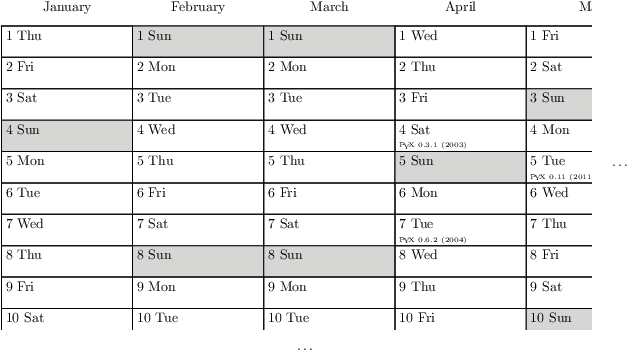

In [1]:
import calendar
from pyx import *

class daystyle(graph.style._style):

    def columnnames(self, privatedata, sharedata, graph, columnnames, dataaxisnames):
        # register the new column names
        usecolumnnames = ["day", "month", "weekday", "note"]
        for columnname in usecolumnnames:
            if columnname not in columnnames:
                raise ValueError("column '%s' missing" % columnname)
        return usecolumnnames

    def adjustaxis(self, privatedata, sharedata, graph, plotitem, columnname, data):
        # adjust axes ranges
        if columnname == "month":
            graph.axes["x"].adjustaxis([(x, 0) for x in data])
            graph.axes["x"].adjustaxis([(x, 1) for x in data])
        if columnname == "day":
            graph.axes["y"].adjustaxis([(x, 0) for x in data])
            graph.axes["y"].adjustaxis([(x, 1) for x in data])

    def drawpoint(self, privatedata, sharedata, graph, point):
        # draw a single day
        x1_pt, y1_pt = graph.pos_pt((point["month"], 0), (point["day"], 0))
        x2_pt, y2_pt = graph.pos_pt((point["month"], 1), (point["day"], 1))
        p = path.rect_pt(x1_pt, y1_pt, x2_pt - x1_pt, y2_pt - y1_pt)
        if point["weekday"] == calendar.day_abbr[-1]:
            graph.stroke(p, [deco.filled([color.gray(0.8)])])
        else:
            graph.stroke(p)
        graph.text_pt(x1_pt+3, y2_pt-3,
                      "%i %s" % (point["day"], point["weekday"]),
                      [text.valign.top])
        if point["note"]:
            graph.text_pt(x1_pt+3, y1_pt+3, point["note"], [text.size.tiny])

# create calendar data
year = 2015
notes = {1: {17: r"\PyX{} 0.2 (2003)", 20: r"\PyX{} 0.5 (2004)", 22: r"\PyX{} 0.5.1 (2004)"},
         3: {30: r"\PyX{} 0.6 (2004)", 31: r"\PyX{} 0.3 ('03), \PyX{} 0.6.1 ('04)"},
         4: {4: r"\PyX{} 0.3.1 (2003)", 7: r"\PyX{} 0.6.2 (2004)", 27: r"\PyX{} 0.6.3 (2004)", 30: r"\PyX{} 0.14 (2015)"},
         5: {5: r"\PyX{} 0.11 (2011)", 20: r"\PyX{} 0.11.1 (2011)", 24: r"\PyX{} 0.9 (2006)"},
         7: {13: r"\PyX{} 0.8 (2005)", 14: r"\PyX{} 0.15 (2019)"},
         8: {13: r"\PyX{} 0.8.1 (2005)", 22: r"\PyX{} 0.4 (2003)"},
         9: {17: r"\PyX{} 0.4.1 (2003)"},
         10: {3: r"\PyX{} 0.10 (2007)", 7: r"\PyX{} 0.1 (2002)", 12: r"\PyX{} 0.12 (2012)",
              21: r"\PyX{} 0.7 (2004)", 26: r"\PyX{} 0.12.1 (2012)"},
         11: {2: r"\PyX{} 0.14.1 (2015)"},
         12: {15: r"\PyX{} 0.7.1 (2004)", 20: r"\PyX{} 0.13 (2013)"}}
d = graph.data.points([(day,
                        calendar.month_name[month],
                        calendar.day_abbr[calendar.weekday(year, month, day)],
                        notes.get(month, {}).get(day))
                       for month in range(1, 13)
                       for day in range(1, calendar.monthrange(year, month)[1]+1)],
                      day=1, month=2, weekday=3, note=4)

# create the calendar
g = graph.graphxy(width=40, x2=graph.axis.bar(dist=0, linkpainter=None),
                  y=graph.axis.bar(dist=0, reverse=1, painter=None))
g.plot(d, [daystyle()])

# we could write the full calendar by
# g.writeEPSfile("cal", paperformat=document.paperformat.A3, rotated=1)

# instead we clip the result to show only a small part
clip = canvas.clip(g.bbox().enlarged(0.1, bottom=-17, right=-25).path())
gc = canvas.canvas([clip])
gc.insert(g)
# and add some dots at the clipped parts
gcbb = gc.bbox()
c = canvas.canvas()
c.insert(gc)
c.text(gcbb.right()+0.5, gcbb.center()[1], r"\dots")
c.text(gcbb.center()[0], gcbb.bottom()-0.5, r"\dots")
c

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> In this example we create a calendar graph style. The style uses bar axes
for both graph coordinates and it is a simple and minimal example in the sense
that it does not make use of other styles for positioning.
